# KNN Classification (genes)

## using 'gene_expression'  data set

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

print('Pandas version :', pd.__version__)
print('Numpy version  :', np.__version__)
print('Matplot version:', matplotlib.__version__);
print('Seaborn version:', sns.__version__)
print('Sklearn version:', sk.__version__)

print('--------------')
print(pd.Timestamp.now())

Pandas version : 2.2.2
Numpy version  : 1.26.4
Matplot version: 3.9.2
Seaborn version: 0.13.2
Sklearn version: 1.5.1
--------------
2025-03-17 09:40:45.882440


In [3]:
def whatis(d):
    print("Type : ", type(d))
    print("Shape: ", d.shape)

In [4]:
df = pd.read_csv('../Data/gene_expression.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB
None


In [5]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [6]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [7]:
X=df.drop('Cancer Present', axis=1)
y=df['Cancer Present']
X

,Gene One,Gene Two
0,4.3,3.9
1,2.5,6.3
2,5.7,3.9
3,6.1,6.2
4,7.4,3.4
...,...,...
2995,5.0,6.5
2996,3.4,6.6
2997,2.7,6.5
2998,3.3,5.6


<Axes: xlabel='Gene One', ylabel='Gene Two'>

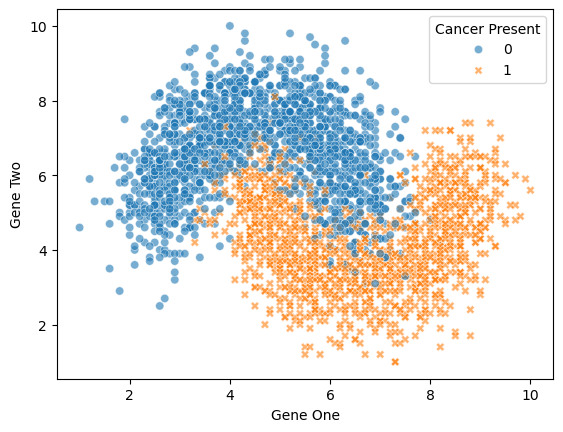

In [8]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.6, style='Cancer Present')
#plt.xlim(2, 6)
#plt.ylim(4, 8)

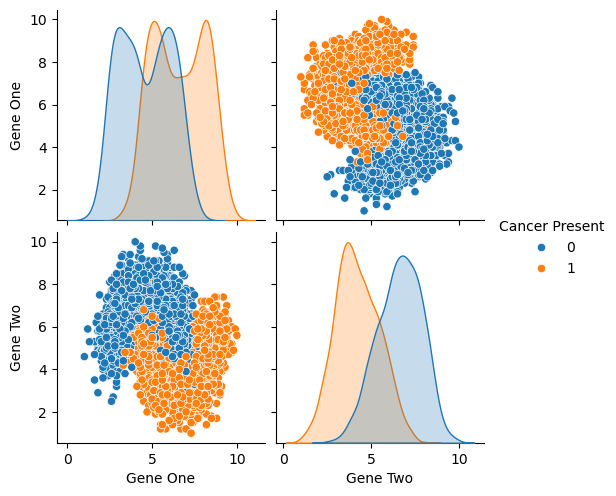

In [9]:
sns.pairplot(data=df, hue='Cancer Present')

In [10]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# fit based ONLY on training features 
scaler.fit(X_train)

# transform both training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
#help(KNeighborsClassifier)

In [13]:
k = 3

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
y_preds = knn.predict(X_test_scaled)
#y_preds

In [15]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [16]:
cm=confusion_matrix(y_test, y_preds)
cm

array([[437,  33],
       [ 33, 397]], dtype=int64)

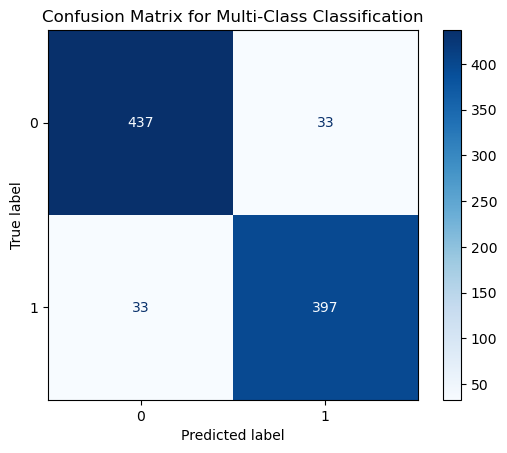

In [17]:
#cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix for Multi-Class Classification")
plt.show()

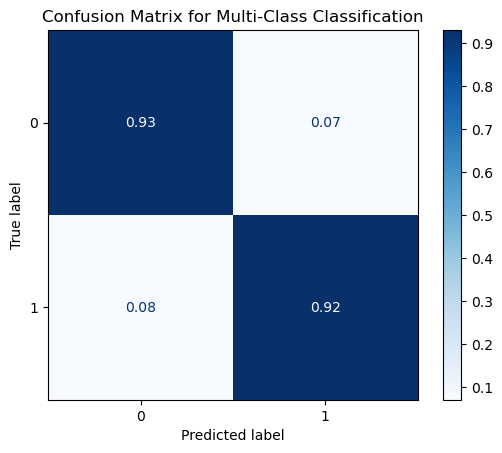

In [19]:
cm = confusion_matrix(y_test, y_preds, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap="Blues", values_format='.2f')
plt.title("Confusion Matrix for Multi-Class Classification")
plt.show()

In [21]:
accuracy_score(y_test, y_preds), 1-accuracy_score(y_test, y_preds)

(0.9266666666666666, 0.07333333333333336)

In [23]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.92      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



In [28]:
df['Cancer Present'].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64